<div style="display: flex; justify-content: center;">
    <img src="../images/Logo-personal_Fondo_blanco.png" alt="Logo_personal" /> 
</div>
<p align="center">
  <h1 align="center">Inferential Statistics<h1>
  <h4 align="center">Obesity rates dataset</h4>
</p>

---

## Introduction
This notebook is the result of the practice carried out in the course ["Curso de Estadística Inferencial para Data Science e Inteligencia Artificial"](https://platzi.com/cursos/estadistica-inferencial-python/), where the Dataset "ObesityDataSet_raw_and_data_synthetic" was used evaluates the confidence intervals, hypothesis testing and bootstrapping.

This analysis is based on the article ["Estadística inferencial con Python: intervalos de confianza y prueba de hipótesis"](https://platzi.com/blog/estadistica-inferencial-con-python-intervalos-de-confianza-y-prueba-de-hipotesis/) by Axel Yaguana

The purpose of the project is to put into practice the concepts of descriptive statistics focused on data science, through the following workflow:

- Development
  - Statistical summary of the total dataset
- Statistical inference: confidence intervals
  - How do we interpret confidence intervals?
- Hypothesis testing
- Bootstrapping
  - Define the null hypothesis and alternative hypothesis
- Conclusion


## Data
The Data set ["ObesityDataSet_raw_and_data_synthetic"](https://www.kaggle.com/datasets/ankurbajaj9/obesity-levels/code) of kaggel contains indices of obesity based on eating habits & physical cond

**Columns**

*Feeding Habits*

* Frequent consumption of high-calorie foods (FAVC)
* Frequency of consumption of vegetables (FCVC)
* Number of main meals (NCP)
* Consumption of food between meals (CAEC)
* Daily water consumption (CH20)
* Alcohol consumption (CALC).

*Physical condition*
* Monitoring calorie consumption (SCC),
* Frequency of physical activity (FAF),
* Time using technological devices (TUE),
* Transportation used (MTRANS),

___


## Development
### Importing Libraries

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

print('Imported libraries')

Imported libraries


### Import the dataset

In [36]:
df = pd.read_csv("../data/ObesityDataSet_raw_and_data_sinthetic.csv")
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


#### Statistical summary of the total dataset

In [5]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


___ 
#### How to know the statistical parameters of the total population?
## Statistical inference: confidence intervals

For the example, the data will be filtered by the attribute "Height"
- We verify that it is a normal distribution.

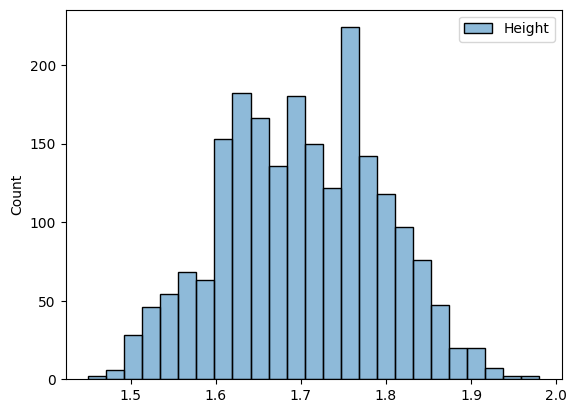

In [63]:
df_height = df["Height"].values
sns.histplot(df_age);

<Axes: >

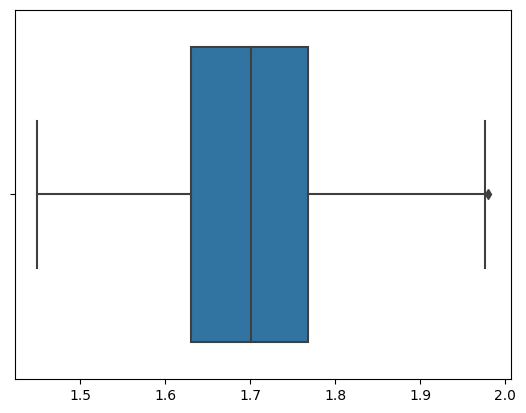

In [67]:
sns.boxplot(x = df_height)

To find a total population statistic from the data, we will employ a resampling technique called Bootstrapping. It consists of choosing random values from the sample and replacing them, creating new arrays. The statistic we are looking for is applied to these new arrays (the mean in our case).

In [68]:
df_height

array([1.62    , 1.52    , 1.8     , ..., 1.752206, 1.73945 , 1.738836])

In [85]:
def bootstrap_prob (data, func, size):
    prob_fun= []
    for _ in range (size):
        sample = random.choices(data, k = size)
        prob_fun.append(func(sample))
    return prob_fun  
    

In [86]:
mean_df_height = bootstrap_prob(df_height, func = np.mean, size = 10000)

In [87]:
mean_df_height

[1.7029010457,
 1.702428716,
 1.700389959,
 1.7034623829,
 1.7008907768000001,
 1.7024745999,
 1.7005943388,
 1.701362542,
 1.7015621649000001,
 1.7010083126000002,
 1.7024779566999997,
 1.7020212767,
 1.7012265479000002,
 1.7011844069,
 1.7007108295000002,
 1.7008580846,
 1.7042415932,
 1.701578296,
 1.7013009782000001,
 1.6995881865,
 1.7032843106,
 1.7024403531,
 1.7013301878000002,
 1.7008321436000002,
 1.702241967,
 1.7013643561999998,
 1.7026520389999997,
 1.7014986199,
 1.7026556999,
 1.7015263054000003,
 1.7016896601,
 1.7018207514,
 1.6997820968,
 1.7014098377000002,
 1.7011486078000002,
 1.7027032397000004,
 1.7018776868,
 1.7000276039,
 1.7017891156000002,
 1.6999084168,
 1.7023773533,
 1.7025221775,
 1.7026724452000002,
 1.7014538158999999,
 1.7026126176000003,
 1.7010844014,
 1.7013432735999998,
 1.7018742216999998,
 1.7020524996,
 1.7023479136000002,
 1.7018493539000004,
 1.7016915522,
 1.7021302992,
 1.7017223322,
 1.7027020993000002,
 1.7008259758,
 1.7030511156,
 1.702

Find the confidence intervals

In [89]:
ci = np.percentile(mean_df_height, [2.5, 97.5])
ci

array([1.6998197 , 1.70354805])

### How do we interpret confidence intervals?
If we were to take the height measurements of people again, there is a 95% probability that their average is between 1,699 mt and 1,703 mt. So we could say that the mean of the total population is between these two values with a confidence of 95%. 

Let's graph this.

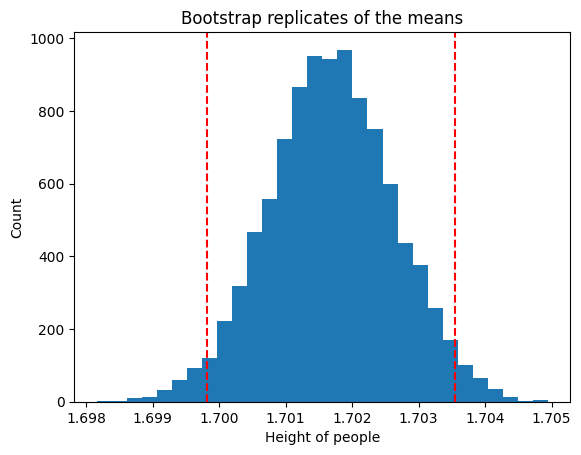

In [106]:
plt.hist(mean_df_height, bins = 30)
plt.axvline(ci[0], color= "r", linestyle = "--")
plt.axvline(ci[1], color= "r", linestyle = "--")
plt.xlabel("Height of people")
plt.ylabel("Count")
plt.title("Bootstrap replicates of the means");

___
## Hypothesis testing

In [109]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [108]:
df["NObeyesdad"].value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

In [117]:
df_weight_types_obesity = df[["Weight", "NObeyesdad"]].sort_values("Weight")
df_weight_types_obesity

,Weight,NObeyesdad
395,39.000000,Insufficient_Weight
725,39.101805,Insufficient_Weight
589,39.371523,Insufficient_Weight
636,39.695295,Insufficient_Weight
588,39.850137,Insufficient_Weight
...,...,...
1838,155.872093,Obesity_Type_III
1910,160.639405,Obesity_Type_III
1898,160.935351,Obesity_Type_III
502,165.057269,Obesity_Type_III


<Axes: xlabel='Weight', ylabel='NObeyesdad'>

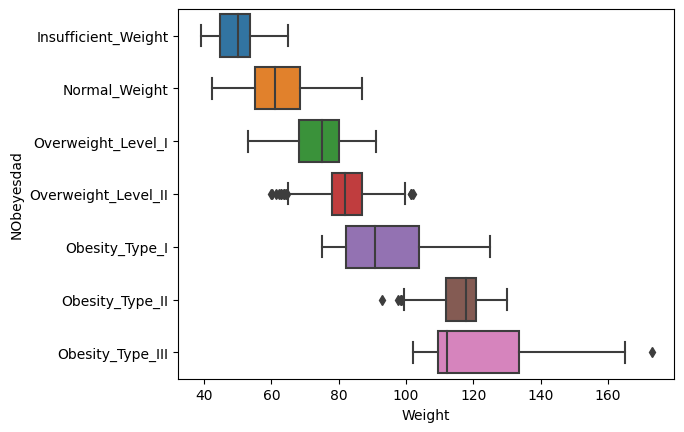

In [118]:
sns.boxplot(data=df_weight_types_obesity,y = df_weight_types_obesity["NObeyesdad"], x = df_weight_types_obesity["Weight"])

It is not entirely correct to conclude that the average Overweight_Level_II is less than the average Obesity_Type_I, because this is just a sample and the results could only be by chance.

Therefore, we will perform a hypothesis testing exercise using Bootstrapping. We are going to statistically prove that this is not pure coincidence. Before doing so, we need to understand a few concepts:

* Null hypothesis: The null hypothesis is that the observed difference is due solely to chance.
* Test statistic: A number computed from the observed data and the simulated data. It's for comparison.
* Statistical significance: When we do a hypothesis test, we look for statistical significance to accept or reject. A result is statistically significant when it is unlikely to have occurred given the null hypothesis. For this we use the p-value.
* p-value: It is the probability of obtaining a value that is at least as extreme as the observed one, considering that the null hypothesis is true. For significance to exist, the p-value must be less than 0.05, or in other cases, less than 0.01.

**Define the null hypothesis and alternative hypothesis**

**Ho**: µ Overweight_Level_I = µ Obesity_Type_II

**Ha**: µ Overweight_Level_I < µ Obesity_Type_II

**µ** is the population mean

#### Extract data from variables

In [142]:
df_weight_over_lev_I  = df_weight_types_obesity[df_weight_types_obesity["NObeyesdad"]  ==  "Overweight_Level_II"]["Weight"]
df_weight_over_lev_I

183      60.000000
1093     60.117993
990      61.373868
1166     62.269912
1135     62.894283
           ...    
1050     99.623778
1126     99.812443
981     101.482054
1066    101.544589
16      102.000000
Name: Weight, Length: 290, dtype: float64

In [143]:
df_weight_obst_typ_II  = df_weight_types_obesity[df_weight_types_obesity["NObeyesdad"]  ==  "Obesity_Type_I"]["Weight"]
df_weight_obst_typ_II

387      75.000000
1355     75.150345
1488     75.279605
1264     75.410647
1484     76.082517
           ...    
1479    118.203130
1261    118.560509
1350    120.702935
1349    121.657979
349     125.000000
Name: Weight, Length: 351, dtype: float64

#### We find the mean of the two variables and their difference

In [192]:
means_diffs_observed =   np.mean(df_weight_obst_typ_II) - np.mean(df_weight_over_lev_I) 

print("The mean of Overweight_Level_II: {}".format(round(np.mean(df_weight_over_lev_I),2)), 
      "The mean of Obesity_Type_I: {}".format(round(np.mean(df_weight_obst_typ_II), 2)),
      "Difference between means: {}". format(round(means_diffs_observed, 2)), sep="\n")

The mean of Overweight_Level_II: 82.09
The mean of Obesity_Type_I: 92.87
Difference between means: 10.78


The next step is to move both arrays so that they have the same mean, since we are simulating a hypothesis where their means are equal. 

* We concatenate the arrays and get their mean.

In [172]:
over_lev_I_obst_typ_II_concat = np.concatenate((df_weight_over_lev_I.values, df_weight_obst_typ_II.values))

* We extract the proper mean of the array and add the mean of the concatenated data.

In [173]:
mean_weight = np.mean(over_lev_I_obst_typ_II_concat)
mean_weight

87.99090213104523

In [174]:
over_lev_I_shifted = df_weight_over_lev_I.values  - np.mean(df_weight_over_lev_I.values) + mean_weight
obst_typ_II_shifted = df_weight_obst_typ_II.values - np.mean(df_weight_obst_typ_II.values) + mean_weight

* We simulate 100,000 samples for both arrays for which we compute the mean.

In [167]:
bs_replicates_over_lev_I = bootstrap_prob(over_lev_I_shifted, func = np.mean, size = 10000)

In [177]:
bs_replicates_obst_typ_II = bootstrap_prob(obst_typ_II_shifted, func = np.mean, size = 10000)

In [184]:
bs_replicates_over_lev_I = np.array(bs_replicates_over_lev_I)
bs_replicates_obst_typ_II = np.array(bs_replicates_obst_typ_II)


* We calculate the test statistic that is the difference of means:

In [185]:
bs_replicates = bs_replicates_over_lev_I - bs_replicates_obst_typ_II  
bs_replicates

array([ 0.14526126,  0.02756327, -0.03089799, ..., -0.05254347,
        0.11904737,  0.12882552])

Plot the mean difference distribution, the p-value that corresponds to the mean difference of the observed data.

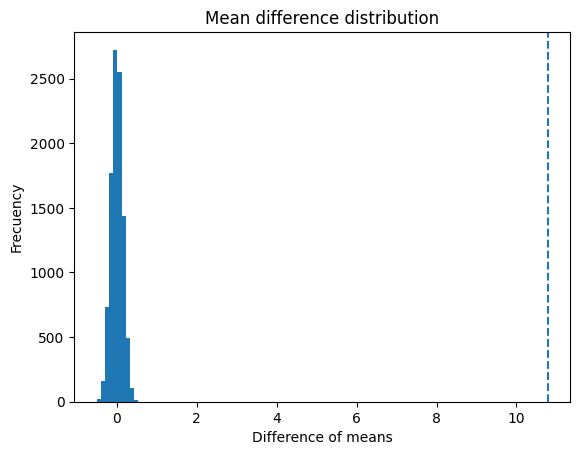

In [197]:
plt.hist(bs_replicates)
plt.axvline(x = means_diffs_observed, linestyle = "--")
plt.title("Mean difference distribution")
plt.ylabel("Frecuency")
plt.xlabel("Difference of means");

In [199]:
p = np.sum(bs_replicates >= means_diffs_observed) / 100000
p

0.0

___
#### Conclusion
*We obtain a p value > at a significance level of 0.05, for which we reject the null hypothesis that "the average Overweight_Level_II is less than the average Obesity_Type_I"*